<a href="https://colab.research.google.com/github/flake313/Malashin/blob/main/7%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Корень методом бисекции: 1.0
Корень методом Ньютона: 1.0000000000004166
Корень методом секущих: 1.0000000000000002


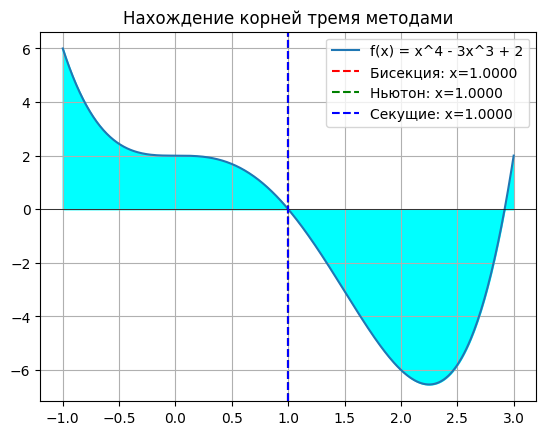

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**4 - 3*x**3 + 2


def dfunc(x):
    return 4*x**3 - 9*x**2

# метод бисекции
def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        print("Неправильный интервал: функция должна менять знак на концах интервала.")
        return None
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c  # точное решение
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# метод Ньютона
def newton_method(f, df, x0, tol):
    xn = x0
    while abs(f(xn)) > tol:
        xn = xn - f(xn) / df(xn)
    return xn

# метод секущих
def secant_method(f, x0, x1, tol):
    while abs(x1 - x0) > tol:
        x_temp = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x_temp
    return x1

# параметры
a = 0
b = 2
x0 = 1.5
x1 = 1.6
tol = 1e-6


root_bisection = bisection_method(func, a, b, tol)
root_newton = newton_method(func, dfunc, x0, tol)
root_secant = secant_method(func, x0, x1, tol)


print(f"Корень методом бисекции: {root_bisection}")
print(f"Корень методом Ньютона: {root_newton}")
print(f"Корень методом секущих: {root_secant}")


x = np.linspace(-1, 3, 400)
y = func(x)

plt.plot(x, y, label="f(x) = x^4 - 3x^3 + 2")
plt.fill_between(x, y, np.zeros_like(y), color='cyan')  # закрашивание области под графиком

# добавление оси и линий для найденных корней
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root_bisection, color='r', linestyle='--', label=f"Бисекция: x={root_bisection:.4f}")
plt.axvline(root_newton, color='g', linestyle='--', label=f"Ньютон: x={root_newton:.4f}")
plt.axvline(root_secant, color='b', linestyle='--', label=f"Секущие: x={root_secant:.4f}")

# оформление графика
plt.title('Нахождение корней тремя методами')
plt.legend()
plt.grid(True)

# Показ графика
plt.show()


0.48198583172416726 - метод прямоугольников
0.4727144306867662 - метод трапеции
0.47163018586230976 - метод симпсона


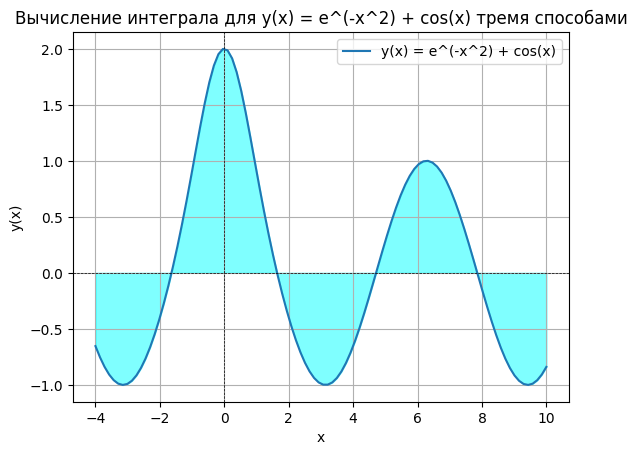

In [3]:
import numpy as np
from matplotlib import pyplot as plt

a = -4
b = 10

# количество шагов (N) для численных методов
N = (b - a) * 10  # количество разбиений интервала

def y(x):
    return np.exp(-x**2) + np.cos(x)

# создаём массив точек x для графика функции
x = np.linspace(a, b, 100)

# вычисляем значения функции y для каждой точки x
y1 = y(x)

# визуализация функции и области под ней
plt.plot(x, y1, label='y(x) = e^(-x^2) + cos(x)')  # график функции y(x)
plt.fill_between(x, y1, np.zeros_like(y1), color='cyan', alpha=0.5)  # заливка области под кривой

# метод прямоугольников
S_rect = 0
for i in range(a * 10, b * 10, 1):  # умножаем a и b на 10 для удобства вычислений
    sn = y(i / 10) * (b - a) / N  # вычисляем площадь одного прямоугольника
    S_rect += sn  # суммируем площади всех прямоугольников
print(S_rect, "- метод прямоугольников")

# метод трапеций
S_trap = 0
for i in range(a * 10, b * 10, 1):
    sn = (y(i / 10) * (b - a) / N + y(i / 10 + 0.1) * (b - a) / N) / 2  # средняя высота трапеции
    S_trap += sn  # суммируем площади всех трапеций
print(S_trap, "- метод трапеции")

# метод Симпсона
width = (b - a) / N  # шаг разбиения
S_simp = 0
for step in range(0, N):
    x1 = a + step * width
    x2 = a + (step + 1) * width
    # вычисляем площадь по методу Симпсона для одного подотрезка
    S_simp += (x2 - x1) / 6.0 * (y(x1) + 4.0 * y(0.5 * (x1 + x2)) + y(x2))
print(S_simp, "- метод симпсона")

# показываем график функции
plt.title('Вычисление интеграла для y(x) = e^(-x^2) + cos(x) тремя способами')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # линия по оси x
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # линия по оси y
plt.legend()
plt.grid(True)
plt.show()


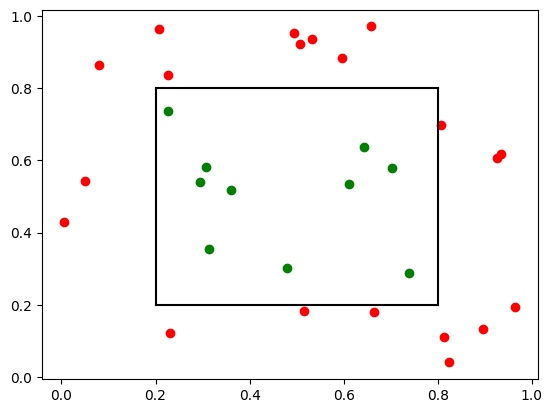

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Y(x):
    if x >= 0:
        return 1
    return 0

N = 30
x = np.random.random(N)
y = np.random.random(N)
w = [1] * N
W1 = np.array([0, -1, 0.8])
W2 = np.array([1, 0, -0.8])
W3 = np.array([0, -1, 0.2])
W4 = np.array([-1, 0, 0.2])
X = np.array([x, y, w])
res = [[Y(val) for val in np.dot(W1, X)], [Y(val) for val in np.dot(W2, X)], [Y(val) for val in np.dot(W3, X)], [Y(val) for val in np.dot(W4, X)]]
X = np.array([res[i] for i in range(len(res))])
W = np.array([1, -1, -1, -1])
par = list()
for i in range(N):
    k = 0
    for j in range(4):
        k += res[j][i] * W[j]
    par.append(k)
A = [0.2, 0.2]
B = [0.8, 0.2]
C = [0.8, 0.8]
D = [0.2, 0.8]
for i in range(N):
    if par[i] == 1:
        plt.scatter(x[i], y[i], c="green")
    else:
        plt.scatter(x[i], y[i], c="red")
plt.plot(A, B, B, C, C, D, D, A, color="black")
plt.show()
